In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [38]:
dump_contents = os.listdir('../dump')
filename_split = dump_contents[0].split('_')
filename_split
len(dump_contents)

150

In [34]:
cu_thickness = 100e-9  
distance = 2.54e-10
number_of_atoms_in_y = cu_thickness / distance 

# parameters
grid_dim_y = int(number_of_atoms_in_y)
grid_dim_x = grid_dim_y // 10

In [39]:
save_list = []
for i in [0,1,2,3,4,5,6,7,8,15,100]:
    filename = dump_contents[i]
    filename_split = filename.split('_')
    time = filename_split[2]
    temperature = filename_split[-1][-4]
    lattice_raw = np.fromfile(f'../dump/{filename}')
    lattice = lattice_raw.reshape((grid_dim_y, grid_dim_x))
    data = [time, temperature, lattice]
    save_list.append(data)
    

<Axes: >

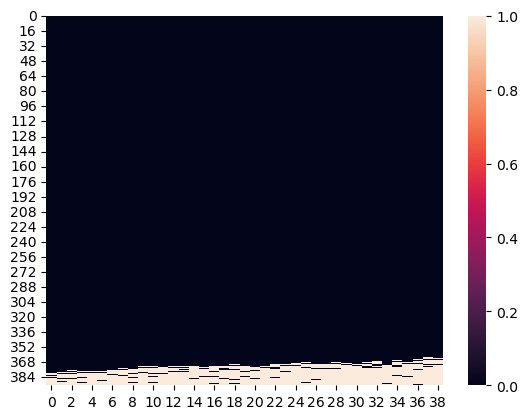

In [41]:
reshaped = save_list[-1][2].reshape((grid_dim_y, grid_dim_x))
sns.heatmap(reshaped)

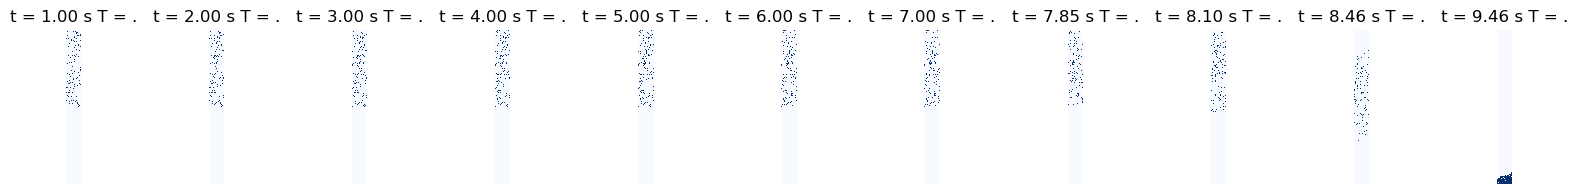

In [42]:
fig, axs = plt.subplots(ncols=11, figsize=(20, 2))
for i, (time, temperature, lattice) in enumerate(save_list):
    axs[i].axis('off')
    axs[i].set_title('t = {time} s T = {temperature}'.format(time=time, temperature=temperature))
    sns.heatmap(lattice, cmap='Blues' , cbar=False, square=True, ax=axs[i], yticklabels=True, xticklabels=True)